In [58]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import glob


In [59]:
df = {}
for i,file in enumerate(glob.glob('usa*.csv')):
    test = pd.read_csv(file)
    df['df'+str(i)] = test

c:\users\srj\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [66]:
data = pd.concat([f for _,f in df.items()])

In [67]:
documents = data[['cleaned_text']]
documents['index'] = data.index

c:\users\srj\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
documents

,cleaned_text,index
0,Everything was fine in the world until Liver...,0
1,There you have it.\n\nProof that this is an ...,1
2,holy shit I hate every person in this video,2
3,I literally just said this lmaoooo,3
4,"“If I get corona, I get corona,” said one Oh...",4
...,...,...
34761,All I know is corona should not cancel bath an...,34761
34762,"Dear Mr. President , Try talking to the PPV C...",34762
34763,I was talking about getting the tattoo.. what...,34763
34764,"I realized I started this project 10 days ago,...",34764


In [26]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
np.random.seed(49)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SrJ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
stemmer = SnowballStemmer('english')
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [69]:
doc_sample = documents[documents['index'] == 4310].values[0][0]
print('Original:')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)

print('Tokenized')
print(preprocess(doc_sample))

Original:
['', '', 'Everybody', 'wanna', 'be', 'outside', 'until', 'they', 'contract', 'corona']
Tokenized
['everybodi', 'wanna', 'outsid', 'contract', 'corona']


In [70]:
processed_docs = documents['cleaned_text'].map(preprocess)
processed_docs[:10]

0    [fine, world, liverpool, decid, premier, leagu...
1    [proof, intent, tactic, trump, tri, bait, figh...
2                    [holi, shit, hate, person, video]
3                                [liter, say, lmaoooo]
4    [corona, corona, say, ohio, student, spring, b...
5    [tri, spur, cultur, distract, incompet, notic,...
6    [generat, want, folk, love, call, everybodi, m...
7    [thing, show, term, coronavirus, intern, like,...
8    [year, pasadena, person, corona, visit, florid...
9               [smoke, break, corona, stay, backkkkk]
Name: cleaned_text, dtype: object

In [71]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k,v in dictionary.iteritems():
    print(k,v)
    count +=1
    if count > 10:
        break

0 coro
1 decid
2 die
3 fine
4 kobe
5 leagu
6 liverpool
7 premier
8 titl
9 world
10 bait


In [72]:
dictionary.filter_extremes(no_below=15,no_above=0.7,keep_n=100000)

In [73]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(27, 1), (40, 1), (666, 1), (730, 1), (2216, 1)]

In [74]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 27 ("corona") appears 1 time.
Word 40 ("everybodi") appears 1 time.
Word 666 ("wanna") appears 1 time.
Word 730 ("outsid") appears 1 time.
Word 2216 ("contract") appears 1 time.


In [40]:
from gensim import corpora,models

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.27892960387593857),
 (1, 0.2318985409699653),
 (2, 0.23674587930934082),
 (3, 0.30066912307061794),
 (4, 0.34796001364521917),
 (5, 0.3571332858779331),
 (6, 0.3964954616943907),
 (7, 0.3631946762102576),
 (8, 0.4292218900404937)]


In [42]:
lda_model = gensim.models.LdaMulticore(bow_corpus,num_topics=10,id2word=dictionary,passes=2,workers=2)

In [43]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.163*"corona" + 0.053*"virus" + 0.027*"tire" + 0.021*"test" + 0.015*"think" + 0.013*"deliber" + 0.012*"come" + 0.011*"dear" + 0.010*"okay" + 0.010*"laker"
Topic: 1 
Words: 0.035*"corona" + 0.028*"time" + 0.024*"virus" + 0.023*"racist" + 0.020*"china" + 0.019*"coronavirus" + 0.019*"american" + 0.018*"trump" + 0.015*"asshol" + 0.015*"incompet"
Topic: 2 
Words: 0.160*"corona" + 0.048*"take" + 0.046*"stop" + 0.045*"bitch" + 0.041*"white" + 0.039*"schedul" + 0.039*"nasti" + 0.039*"smell" + 0.039*"motherfuckin" + 0.031*"like"
Topic: 3 
Words: 0.063*"look" + 0.043*"sick" + 0.034*"work" + 0.033*"believ" + 0.032*"home" + 0.019*"like" + 0.019*"great" + 0.019*"increas" + 0.018*"miami" + 0.017*"social"
Topic: 4 
Words: 0.090*"go" + 0.090*"corona" + 0.076*"tell" + 0.068*"sick" + 0.065*"decemb" + 0.063*"earli" + 0.063*"includ" + 0.062*"bare" + 0.062*"nasti" + 0.062*"round"
Topic: 5 
Words: 0.067*"trump" + 0.064*"corona" + 0.040*"chines" + 0.030*"show" + 0.029*"brief" + 0.028*"cross

In [75]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5, id2word=dictionary, passes=5, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.026*"break" + 0.024*"chan" + 0.020*"person" + 0.020*"center" + 0.018*"start" + 0.016*"round" + 0.016*"mask" + 0.015*"memori" + 0.014*"ralli" + 0.014*"holi"
Topic: 1 Word: 0.095*"let" + 0.095*"grant" + 0.036*"action" + 0.035*"teach" + 0.035*"base" + 0.035*"shot" + 0.035*"china" + 0.035*"engag" + 0.033*"sunday" + 0.031*"ralli"
Topic: 2 Word: 0.023*"polit" + 0.022*"quarantin" + 0.021*"play" + 0.021*"pros" + 0.021*"put" + 0.020*"trash" + 0.019*"presid" + 0.017*"memori" + 0.017*"con" + 0.016*"card"
Topic: 3 Word: 0.126*"love" + 0.067*"millenni" + 0.065*"generat" + 0.065*"spur" + 0.064*"call" + 0.063*"folk" + 0.063*"everybodi" + 0.055*"expect" + 0.052*"week" + 0.036*"wasn"
Topic: 4 Word: 0.034*"talk" + 0.031*"test" + 0.030*"loan" + 0.029*"share" + 0.029*"throw" + 0.028*"memori" + 0.028*"resourc" + 0.027*"small" + 0.019*"tri" + 0.014*"break"


In [53]:
from gensim.models import CoherenceModel
from tqdm import tqdm
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3): 
    """
    Compute c_v coherence for various number of topics
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respect """
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = gensim.models.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, iterations=600, passes=2) 
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
#        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [76]:
topic_count_start = 3
topic_count_step = 1
topic_count_limit = 10
# Can take a long time to run.
model_list, coherence_values = \
  compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=None, limit=topic_count_limit, start=topic_count_start, step=topic_count_step)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [05:35<00:00, 47.97s/it]


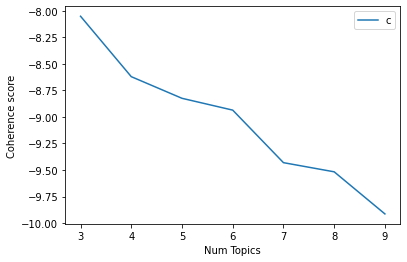

In [77]:
import matplotlib.pyplot as plt 
%matplotlib inline
# Show graph
x = range(topic_count_start, topic_count_limit, topic_count_step)
plt.plot(x, coherence_values) 
plt.xlabel("Num Topics") 
plt.ylabel("Coherence score") 
plt.legend(("coherence_values"), loc='best') 
plt.show()

In [ ]:
from contextualized_topic_models.models.ctm import CTM
from contextualized_topic_models.utils.data_preparation import TextHandler
from contextualized_topic_models.utils.data_preparation import bert_embeddings_from_file
from contextualized_topic_models.datasets.dataset import CTMDataset

handler = TextHandler("documents.txt")
handler.prepare() # create vocabulary and training data

# generate BERT data
training_bert = bert_embeddings_from_file("documents.txt", "distiluse-base-multilingual-cased")

training_dataset = CTMDataset(handler.bow, training_bert, handler.idx2token)

ctm = CTM(input_size=len(handler.vocab), bert_input_size=512, inference_type="combined", n_components=50)

ctm.fit(training_dataset) # run the model